# MARS5001 Coastal Processes & Systems


## NB1 - Ocean Radar Data Query
<br />
<br />
<br />

## Using IPython


IPython is a command shell for interactive computing in multiple programming languages, originally developed for the Python programming language, that offers:

* enhanced introspection, 
* rich media, 
* additional shell syntax, 
* tab completion, and
* rich history. 

In [2]:
from IPython.core.display import HTML
HTML('<iframe src=http://nbviewer.ipython.org width=800 height=400></iframe>')

## IPython is a nice tool for teaching & learning

+ Active community: access to thousands of notebooks,
+ Range of pythonize disciplines is vast: Math, Medical Sciences, Geosciences, Economy... 
+ Starting using IPython is **EASY** ! 


## Installing modules

A module is a Python object with arbitrarily named attributes that you can bind and reference. A module is a fit-2-purpose pice of code which defines 

+ functions, 
+ classes, 
+ variables, 
+ a runnable code.

Installing a module is usually done using Python Package Installer: <code>pip</code>. 

Loading a module is straight forward:

In [4]:
%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from IPython.core.display import HTML
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show

## Ok let start using it...

# Ocean acquisition systems

Many observing systems:

**|  satellites |  buoy networks |  weather radars  |  tide gauges  |  oceanographic ships |  aircraft |  human observers | animal telemetry  |**

<img src='http://assets.fiercemarkets.com/public/sites/energy/marineexplorelarge.jpg' width=1000>

# Big Data

Growth of public ocean data, gathered by observations each day (from Marinexplore.org)
<br/>
<br/>
<img src='http://blog.marinexplore.com/wp-content/uploads/2013/10/Screen-Shot-2013-10-30-at-2.50.34-PM.png' width=1000>

# Ocean data server

* **In the past:** various marine metadata initiatives each independently striving towards their own clear and concise schema. 
* **Now:** move towards wide conventions standards + integrated metadata structures & models

<img src='http://blog.marinexplore.com/wp-content/uploads/2013/11/marinexplore_metadata.jpg' width=700>

# Data server = Data access ;-)

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('7yTpv70gkGE')

## In a nutshell...

* Data access is provided via **HTTP** and **OPeNDAP** by **THREDDS** Data Server and **FTP**. 
* Most data providers are using interactive visualization of data sets with zoomable maps. Sometimes you can even find time series and sections from **LAS**.
<br/>
<br/>


## It sounds a bit like a French guy talking in english... I know!

<br/>
#### HTTP: Hypertext Transfer Protocol
#### OPenDAP: Open-source Project for a Network Data Access Protocol
#### THREDDS: Thematic Real-Time Environmental Distributed Data Services
#### FTP: File Transfer Protocol
#### LAS: Live Access Server

## Main ocean data providers in Australia:

#### AODN: Australian Ocean Data Network

#### IMOS:  Integrated Marine Observing System

#### BOM

#### GA

#### CSIRO

<br/>

## Globally

#### NOAA (US)

#### (Euro)GOOS

# Query IMOS ACORN (Australian Coastal Ocean Radar Network)


<small>
**Acknowlegement** &mdash; This  is based on the teaching material compiled by <a href:'https://github.com/DamienIrving/CV/blob/master/CV.md'>Damien Irving</a>.
</small>


<img src="http://imos.org.au/fileadmin/_processed_/csm_Collage01_web_c682500591.png" width=1000>

In [4]:
HTML('<iframe src=http://help.aodn.org.au/help/?q=node/11 width=1000 height=500></iframe>')

## Import IPython Modules

We will need **netCDF** libray (<a ref='http://www.unidata.ucar.edu/netcdf/'>Network Common Data Form</a>) is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. The project homepage is hosted by the **Unidata** program at the University Corporation for Atmospheric Research (**UCAR**).

In [7]:
%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show

## Get the data from IMOS

In [8]:
# Turquoise bay
acorn_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/ACORN/monthly_gridded_1h-avg-current-map_non-QC/TURQ/2012/IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc.gz'
# Other ACORN data as an example:
# South Australia Gulf
#acorn_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/ACORN/monthly_gridded_1h-avg-current-map_non-QC/SAG/2015/IMOS_ACORN_V_20150101T003000Z_SAG_FV00_monthly-1-hour-avg_END-20150131T233000Z_C-20150201T235953Z.nc'
# Bonney Coast
#acorn_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/ACORN/monthly_gridded_1h-avg-current-map_non-QC/BONC/2015/IMOS_ACORN_V_20150101T000000Z_BONC_FV00_monthly-1-hour-avg_END-20150131T190000Z_C-20150202T000206Z.nc'

acorn_DATA = Dataset(acorn_URL)

The first thing to notice is the distinctive **Data Reference Syntax** (DRS) associated with the file. The staff at IMOS have archived the data according to the following directory structure:

**http://thredds.aodn.org.au/thredds/dodsC/project/organisation/collection/facility/data-type/site-code/year/**

From this we can deduce, without even inspecting the contents of the file, that we have data from the IMOS project that is run by the eMarine Information Infrastructure (eMII). It was collected in 2012 at the Turquoise Coast, Western Australia (TURQ) site of the Australian Coastal Ocean Radar Network (ACORN), which is a network of high frequency radars that measure the ocean surface current (see this <a href='http://researchdata.ands.org.au/imos-acorn-turquoise-australia-australia/442676'>page</a> on the Research Data Australia website for a nice overview of the dataset).

<br/>
<small>While it's unlikely that your research will ever involve cataloging data from such a large observational network, it's still a very good idea to develop your own personal DRS for the data you do have. This often involves investing some time at the beginning of a project to think carefully about the design of your directory and file name structures, as these can be very hard to change later on (a good example is the <a ref='http://cmip-pcmdi.llnl.gov/cmip5/docs/cmip5_data_reference_syntax.pdf'>DRS</a> used by the Climate Model Intercomparison Project). The combination of bash shell wildcards and a well planned DRS is one of the easiest ways to make your research more efficient and reliable.
</small>



The data type has a sub-DRS of its own, which tells us that the data represents the 1-hourly average surface current for a single month (October 2012), and that it is archived on a regularly spaced spatial grid and has not been quality controlled. The file is located in the "demos" directory, as it has been generated for the purpose of providing an example for users in the very helpful <a ref='http://portal.aodn.org.au/aodn/'>Australian Ocean Data Network</a> (AODN) <a href='https://github.com/aodn/imos-user-code-library'> user code library</a>.

Just in case the file gets separated from this informative directory stucture, much of the information is repeated in the file name itself, along with some more detailed information about the start and end time of the data, and the last time the file was modified.

**project_facility_V_time-start_site-code_FV00_data-type_time-end_modified.nc.gz**

In the first instance this level of detail seems like a bit of overkill, but consider the scope of the IMOS data archive. It is the final resting place for data collected by the entire national array of oceanographic observing equipment in Australia, which monitors the open oceans and coastal marine environment covering physical, chemical and biological variables. Since the data are so well labelled, locating all monthly timescale ACORN data from the Turquoise Coast and Rottnest Shelf sites (which represents hundreds of files) would be as simple as typing the following at the command line:

**ls */ACORN/monthly_*/{TURQ,ROT}/\*/\*.nc**

## Check the loaded ACORN dataset

In [9]:
print acorn_DATA

<type 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    project: Integrated Marine Observing System (IMOS)
    Conventions: IMOS version 1.3
    institution: Australian Coastal Ocean Radar Network (ACORN)
    title: IMOS ACORN Turquoise Coast site (WA) (TURQ), monthly aggregation of one hour averaged current data
    instrument: CODAR Ocean Sensors/SeaSonde
    site_code: TURQ, Turqoise Coast
    ssr_Stations: SeaBird (SBRD), Cervantes (CRVT)
    id: IMOS/ACORN/au/TURQ/2012-10-08T15:00:00Z.sea_state
    date_created: 2012-10-30T16:31:50Z
    abstract: These data have not been quality controlled. The ACORN facility is producing NetCDF files with radials data for each station every ten minutes.  Radials represent the surface sea water state component  along the radial direction from the receiver antenna  and are calculated from the shift of an area under  the bragg peaks in a Beam Power Spectrum.  The radial values have been calculated using software 

## With Python: query the dataset

The great thing about netCDF files is that they contain <a href=http://en.wikipedia.org/wiki/Metadata>metadata</a> - that is, data about the data. There are global attributes that give information about the file as a whole, while each variable also has its own attributes.

In [10]:
print 'The file contains the following variables:'
print acorn_DATA.variables.keys()

The file contains the following variables:
[u'LATITUDE', u'LONGITUDE', u'LATITUDE_quality_control', u'LONGITUDE_quality_control', u'TIME', u'SPEED', u'UCUR', u'VCUR', u'TIME_quality_control', u'SPEED_quality_control', u'UCUR_quality_control', u'VCUR_quality_control']


The 'u' means each variable name is represented by a Unicode string.

In [11]:
print 'These are the attributes of the time axis:'
print acorn_DATA.variables['TIME']
print 'These are some of the time values:'
print acorn_DATA.variables['TIME'][0:10]

These are the attributes of the time axis:
<type 'netCDF4.Variable'>
float64 TIME(TIME)
    standard_name: time
    long_name: time
    units: days since 1950-01-01 00:00:00
    axis: T
    valid_min: 0.0
    valid_max: 999999.0
    _FillValue: -9999.0
    calendar: gregorian
    comment: Given time lays at the middle of the averaging time period.
    local_time_zone: 8.0
unlimited dimensions: 
current shape = (493,)
filling off

These are some of the time values:
[ 22919.          22919.04166667  22919.08333333  22919.125       22919.16666667
  22919.20833333  22919.25        22919.29166667  22919.33333333  22919.375     ]


The raw time values are fairly meaningless, but we can use the time attributes to convert them to a more meaningful format...

In [19]:
units = acorn_DATA.variables['TIME'].units
calendar = acorn_DATA.variables['TIME'].calendar

times = num2date(acorn_DATA.variables['TIME'][:], units=units, calendar=calendar)
print times[0:10]

[datetime.datetime(2012, 10, 1, 0, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 1, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 2, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 3, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 4, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 5, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 6, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 7, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 8, 0, tzinfo=tzutc())
 datetime.datetime(2012, 10, 1, 9, 0, tzinfo=tzutc())]


<blockquote>
    <h2>Climate and Forecast (CF) metadata convention</h2>
    <p>When performing simple data analysis tasks on netCDF files, command line tools like the Climate Data Operators (<a href="https://code.zmaw.de/projects/cdo">CDO</a>) are often a better alternative to writing your own functions in Python. However, let's put ourselves in the shoes of the developers of CDO for a minute. In order to calculate the time mean of a dataset for a given start and end date (for example), CDO must first identify the units of the time axis. This isn't as easy as you'd think, since the creator of the netCDF file could easily have called the units attribute measure, or scale, or something else completely unpredictable. They could also have defined the units as weeks since 1-01-01 00:00:00 or milliseconds after 1979-12-31. Obviously what is needed is a standard method for defining netCDF attributes, and that’s where the <a href='http://cf-pcmdi.llnl.gov/'>Climate and Forecast (CF) metadata convention</a> comes in.</p>
    <p>The CF metadata standard was first defined back in the early 2000s and has now been adopted by all the major institutions and projects in the weather/climate sciences. There's a nice <a href='http://drclimate.wordpress.com/2014/06/09/are-you-cf-compliant/'>blog post</a> on the topic if you'd like more information, but for the most part you just need to be aware that if a tool like CDO isn't working, it might be because your netCDF file isn't CF compliant.</p>
</blockquote>

# Calculating the current speed

For the sake of example, let's say that our data file contained the zonal (east/west; 'UCUR') and meridional (north/south; 'VCUR') surface current components, but not the total current speed. To calculate it, we first need to assign a variable to the zonal and meridional current data.

In [20]:
uData = acorn_DATA.variables['UCUR'][:,:,:]
vData = acorn_DATA.variables['VCUR'][:,:,:]

Both <i>uData</i> and <i>vData</i> are a special type of numpy array known as a masked array, whereby some of the points in the time/latitude/longitude grid have missing (or masked) values. Just as with a normal numpy array, we can check the shape of our data (in fact, masked arrays can do everything normal numpy arrays can do and more).

In [21]:
print type(uData)
print uData.shape

<class 'numpy.ma.core.MaskedArray'>
(493, 55, 57)


In other words, 493 time steps, 55 latitudes and 57 longitudes. We can now go ahead and calculate the current speed.

In [22]:
spData = (uData**2 + vData**2)**0.5

# Viewing Turquoise Bay uploaded dataset

It's a good idea to regularly view your data throughout the code development process, just to ensure nothing that crazy has happened along the way. Below is a code except from this <a href='https://github.com/aodn/imos-user-code-library/blob/master/Python/demos/acorn.py'>example</a> in the AODN user code library, which simply plots one of the 493 timesteps.

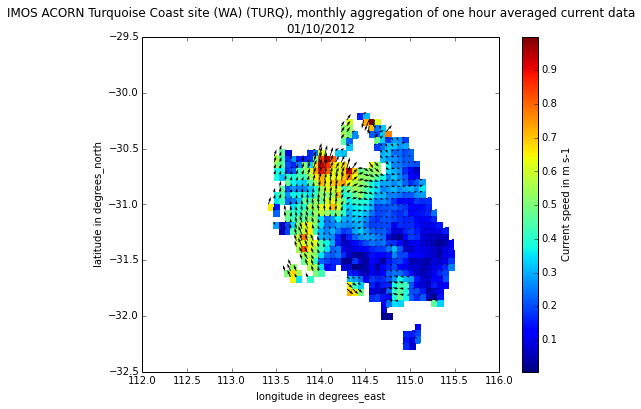

In [24]:
LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']

# Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
timeIndex = 4
speedData = spData[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

# sea water U and V components
uData = acorn_DATA.variables['UCUR'][timeIndex,:,:]
vData = acorn_DATA.variables['VCUR'][timeIndex,:,:]
units = acorn_DATA.variables['UCUR'].units

figure1 = figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, speedData)
cbar = colorbar()
cbar.ax.set_ylabel('Current speed in ' + units)

title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

#plot velocity field
Q = quiver(lonData[:], latData[:], uData, vData, units='width')
show()

---
Jump to notebook2 : <a href='https://ec2-52-11-155-224.us-west-2.compute.amazonaws.com:8888/notebooks/NB2-BuoyWW3.ipynb'> Go to notebook2 </a>

---